# Péndulo

Click [aquí](https://youtu.be/_9i4VsKiwXE) para ver el video subido a YouTube

## Teoría

Sea el sistema:

\begin{cases} 
      x'(t) = F_1(t, x(t), y(t)) \\ 
      y'(t) = F_2(t, x(t), y(t)) \\
      x(t_0) = x_0 \\
      y(t_0) = y_0
\end{cases}

Si trabajamos en el intervalo $[t_0,~ T]$ y queremos dar una aproximación de $(x(T), y(T))$, elegimos $N+1 \in \mathbb{N}$ y puntos equiespaciados $t_0, ..., t_N$ con paso $h = \frac{T-t_0}{N}$, de manera que $t_i = t_0 + ih$, $~i = 0,...,N$.

A la aproximación de $(x(t_i), y(t_i))$ la notaremos $(x_i, y_i)$. Es decir, $(x(t_i), y(t_i)) \approx (x_i, y_i)$. Dicho esto y considerando que 

$$x'(t) = \frac{\delta x}{\delta t} \approx \frac{x_{i+1} - x_i}{t_{i+1} - t_i}$$

el método más general de un paso tiene la forma

\begin{cases} 
   x_{i+1} = x_i + h\phi_1(t_i, x_i, y_i, h) \\ 
   y_{i+1} = y_i + h\phi_2(t_i, x_i, y_i, h) \\
   x(t_0) = x_0 \\
   y(t_0) = y_0
\end{cases}

La idea es calcular $(x_1, y_1)$ conociendo $(x_0, y_0)$. Luego, calculamos $(x_2, y_2)$ conociendo $(x_1, y_1)$, y continuar iterando hasta encontrar $(x_N, y_N) \approx (x(t_N), y(t_N)) = (x(T), y(T))$.

Esto se puede generalizar para $n$ variables y pasar a un sistema matricial. Siguiendo con nuestro ejemplo, con $n = 2$ es:

<div align='center'>
  <img src='./img/sist_ec_dif_dos_v.png' alt='Imagen de un sistema de ecuaciones diferenciales con dos variables'/>
</div>

El método más general de un paso tiene la forma:

<div align='center'>
  <img src='./img/sist_ec_dif_dos_v_aprox.png' alt='Imagen de un sistema de ecuaciones diferenciales con dos variables'/>
</div>

### Buscando las soluciones del péndulo ideal

Se sabe que el ángulo de un péndulo ideal está determinado por la ecuación diferencial

$$\ddot{\theta} = -\frac{g}{L} sen(\theta)$$

cuya solución para $\theta \approx 0$ es $\theta(t) = A ~cos\left( \sqrt{\frac{g}{L}}t + \varphi \right)$, donde la amplitud $A$ y el ángulo de fase $\varphi$ dependen de las condiciones iniciales.

Sin embargo podemos utilizar el método de Runge-Kutta para realizar una mejor aproximación de esta fórmula.

Haciendo convenientes cambios de variable

$$   \begin{cases} 
      x = \theta \\ 
      y = \dot{\theta} \\
     \end{cases} \rightarrow \begin{cases} 
                              \dot{x} = \dot{\theta} = y \\ 
                              \dot{y} = \ddot{\theta} = -\frac{g}{L} sen(\theta) = -\frac{g}{L} sen(x) \\
                              \end{cases} 
$$

llegamos a que

$$ \begin{cases} 
      \dot{x}(t) = y(t) \\ 
      \dot{y}(t) = -\frac{g}{L}sen(x(t)) \\
      x(0) = \theta_0 \\
      y(0) = \dot{\theta}_0
    \end{cases}
$$

Vamos a resolver este sistema con un código utilizando el método de Runge-Kutta de orden 4. En este método, $\phi_n(t_i, x_i, y_i, h) = \frac{1}{6} [K_{1n} + 2K_{2n} + 2K_{3n} + K_{4n}]$, donde:

$$K_{1n} = F_n(t_i, x_i, y_i)$$
$$K_{2n} = F_n(t_i + \frac{h}{2}, ~x_i + \frac{h}{2} K_{1n}, ~y_i + \frac{h}{2} K_{1n})$$
$$K_{3n} = F_n(t_i + \frac{h}{2}, ~x_i + \frac{h}{2} K_{2n}, ~y_i + \frac{h}{2} K_{2n})$$
$$K_{4n} = F_n(t_i + h, ~x_i + h K_{3n}, ~y_i + h K_{3n})$$

## Código

En esta animación se presentan dos péndulos. Uno de ellos utiliza la solución encontrada para ángulos pequeños y otro el utiliza la solución encontrada con el método de aproximación Runge-Kutta de orden 4. Como es de esperarse, ambos péndulos se mueven distinto (en particular el segundo es más preciso, pues no sólo aproxima bien para ángulos pequeños).

Consejo: Analizar las diferencias entre la animación visualizada al utilizar un ángulo inicial grande $\theta \approx 90°$ y luego uno pequelo $\theta \approx 0$. 

Es recomendable que el ángulo inicial $\theta_0$ cumpla $0° < \theta < 90°$ para que sea más realista (ya que el hilo realmente no es inextensible).

Considerar que con estos valores de $t0$, $T$ y $h$, la siguiente animación me habría tardado mucho tiempo en crearse si no fuera porque disminuí la gran cantidad de valores de t_ y z_

La animación se configuró para que la simulación considere tiempos reales (un segundo de simulación equivale a un segundo real) y para que esté en aproximadamente 60 fotogramas por segundo. En [tiempo_real.ipynb](teoria/tiempo_real.ipynb) explico cómo.

**Nota**: ver la teoría explicada más arriba si se desea entender las fórmulas utilizadas

Animación a 62.55 fotogramas por segundo


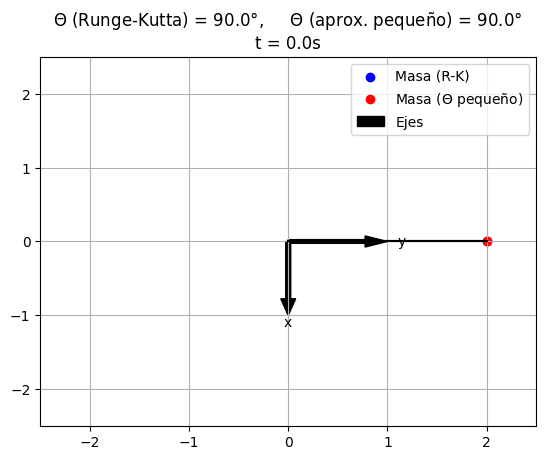

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc

rc('animation', html='html5')

t0 = 0 # s | Tiempo inicial
z0 = [np.pi/2, 0] # rad | Ángulo y velocidad angular inicial (z(t) = [x(t), y(t)], por lo tanto z0 = [x0, y0])
T = 20 # s | Tiempo final
h = 1e-3 # Longitud de cada paso a la hora de aproximar con runge-kutta

g = 9.81 # m/s^2 | Aceleración de la gravedad
L = 2 # m | Largo del hilo

def F(t, z): # Defino una función que me permita obtener F sabiendo un (t, z(t))
    F1 = z[1]
    F2 = (-g/L)*np.sin(z[0])
    return np.array([F1, F2])

######################

def haceme_runge_kutta_(F, t0, T, z0, h):
    t = np.arange(t0, T+h, h)
    d = len(z0)
    n = len(t)
    z = np.zeros((n, d))
    z[0,:] = z0
    for i in range(n-1):                         
        K1 = F(t[i], z[i,:])               
        K2 = F(t[i] + (h/2), z[i,:] + (h/2)*K1)
        K3 = F(t[i] + (h/2), z[i,:] + (h/2)*K2)
        K4 = F(t[i] + h, z[i,:] + h*K3)
        z[i+1,:] = z[i,:] + (h/6)*(K1 + 2*K2 + 2*K3 + K4)                  
    return [t, z]

t_, z_ = haceme_runge_kutta_(F, t0, T, z0, h) # Solución gracias al método Runge-Kutta de orden 4

############################## Recorte de elementos en el dominio e imagen para que la animación requiera menos esfuerzo computacional:
# Observo que len(t_) = 20001 y T-t0 = 20. Eso haría que mi animación tenga 1000 fotogramas por segundo si queremos que la animación se ejecute en tiempo real, y tardaría mucho tiempo en crearse (además, no necesitamos tantos fotogramas).
# Utilizo el siguiente código para disminuir la densidad de elementos en el dominio e imagen.

def recorte_de_array(t):
    t = list(t)
    if (len(t) % 2) != 0: 
        for i in range(1, int(len(t)/2) + 1): 
            t.pop(i)
    else:                
        for i in range(1, int(len(t)/2)):
            t.pop(i)
    return np.array(t)   
    
t_, z_ = recorte_de_array(t_), recorte_de_array(z_[:,0]) # Filtro cuatro veces. Cada vez que flitro quito aproximadamente la mitad de elementos. No elimina los extremos
t_, z_ = recorte_de_array(t_), recorte_de_array(z_)
t_, z_ = recorte_de_array(t_), recorte_de_array(z_)
t_, z_ = recorte_de_array(t_), recorte_de_array(z_) # De 1000 fotogramas por segundo pasé a aproximadamente 1000/(2^4)

############################## Solución considerando una aproximación para ángulos pequeños:

r = np.sqrt(g/L)
phi = np.arctan( (-z0[1])/(z0[0]*r) ) - r*t0 # Fase phi
A = z0[0]/(np.cos(r*t0 + phi)) # Amplitud A

xx = np.linspace(t0, T, len(t_))
yy = A*np.cos(r*xx + phi) # Eje horizontal y vertical de la solución aproximada para ángulos pequeños

############################## ANIMACIÓN:
 
fig = plt.figure() # Creamos la figura donde se va a hacer la animación
ax = fig.gca() # Hace un par de ejes

def actualizar(i): # La animación va a pasar por esta función muchas veces, una por cada valor de "i". Cada vez que pase por acá va a crear una nueva figura y calcular nuevos parámetros. Luego junta todas esas figuras para crear un video.
    ax.clear() # Borra todo lo que está en la figura, para que las imágenes no se superpongan.
    
    theta_scatter = z_[i] # Tomo el valor i-ésimo de la lista de thetas aproximados con Runge-Kutta
    x_scatter = L*np.cos(theta_scatter) # Calculo la posición x e y de la masa con las coordenadas polares (suponiendo que estamos en los ejes tradicionales, pero no es el caso).
    y_scatter = L*np.sin(theta_scatter) 
    plt.scatter(y_scatter, -x_scatter, color = 'blue', label = 'Masa (R-K)') # Grafico el punto por donde está la masa en un tiempo y ángulo determinado, considerando que los ejes (x, y) utilizados están rotados
            
    ##############

    theta_scatter2 = yy[i] # Razonamiento análogo al anterior, pero ahora tomando los valores de theta para ángulos pequeños
    x_scatter2 = L*np.cos(theta_scatter2)
    y_scatter2 = L*np.sin(theta_scatter2) 
    plt.scatter(y_scatter2, -x_scatter2, color = 'red', label = 'Masa ($\Theta$ pequeño)')
          
    ##############

    plt.annotate('y', xy = ((L+L*0.1)/2, -0.05)) # Anoto "y" en la figura
    plt.annotate('x', xy = (-0.05, -(L+L*0.1)/2 - 0.05))
    plt.arrow(0, 0, L/2, 0, width = 0.05, length_includes_head = True, color = 'black', label = 'Ejes') # Agrego el dibujo de la flecha horizontal
    plt.arrow(0, 0, 0, -L/2, width = 0.05, length_includes_head = True, color = 'black')
    plt.plot([0, y_scatter], [0, -x_scatter], color = 'black') # Agrego los hilos
    plt.plot([0, y_scatter2], [0, -x_scatter2], color = 'black')
    
    plt.title('$\Theta$ (Runge-Kutta) = ' + str(round(theta_scatter*180/np.pi, 2)) + '°,     $\Theta$ (aprox. pequeño) = ' + str(round(theta_scatter2*180/np.pi, 2)) + '°\n' + 't = ' + str(round(t_[i], 2)) + 's') # Agrego los valores de theta y de tiempo
    plt.xlim(-L - 0.5, L + 0.5)
    plt.ylim(-L - 0.5, L + 0.5)
    plt.legend()
    plt.grid()

f = len(t_)/(T-t0) # Fotogramas por segundo. Consejo: con un valor máximo de 60 es suficiente. Si lo sobrepasa, estaríamos haciendo esfuerzo computacional innecesario.

X = 1000/f # Si ponemos este X en interval, podríamos conseguir que la animación esté en tiempo real
print(f'Animación a {f} fotogramas por segundo')
ani = animation.FuncAnimation(fig, actualizar, range(len(t_)), interval = X) # Agarra la figura llamada "fig", itera la función "actualizar", y saca "n" fotos definidas por el range. interval = X hace que cada foto esté sacada cada X milisegundos.
ani